# UK Traffic Accidents Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

from prophet import Prophet
import plotly.express as px
import plotly.graph_objects as go

from imblearn.over_sampling import SMOTE

In [2]:
df_acc_05_07 = pd.read_csv('datasets/accidents_2005_to_2007.csv', low_memory=False)
df_acc_09_11 = pd.read_csv('datasets/accidents_2009_to_2011.csv', low_memory=False)
df_acc_12_14 = pd.read_csv('datasets/accidents_2012_to_2014.csv', low_memory=False)

df_accidents = pd.concat([df_acc_05_07, df_acc_09_11, df_acc_12_14], ignore_index=True)

In [3]:
df_traffic_flow = pd.read_csv('datasets/ukTrafficAADF.csv')

In [4]:
print(f"Toplam kaza kaydı sayısı: {len(df_accidents)}")
df_accidents.head().T

Toplam kaza kaydı sayısı: 1504150


,0,1,2,3,4
Accident_Index,200501BS00001,200501BS00002,200501BS00003,200501BS00004,200501BS00005
Location_Easting_OSGR,525680.0,524170.0,524520.0,526900.0,528060.0
Location_Northing_OSGR,178240.0,181650.0,182240.0,177530.0,179040.0
Longitude,-0.19117,-0.211708,-0.206458,-0.173862,-0.156618
Latitude,51.489096,51.520075,51.525301,51.482442,51.495752
Police_Force,1,1,1,1,1
Accident_Severity,2,3,3,3,3
Number_of_Vehicles,1,1,2,1,1
Number_of_Casualties,1,1,1,1,1
Date,04/01/2005,05/01/2005,06/01/2005,07/01/2005,10/01/2005


In [5]:
df_traffic_flow.head().T

,0,1,2,3,4
AADFYear,2000,2000,2000,2000,2000
CP,6007,6009,6035,6054,6055
Estimation_method,Counted,Counted,Counted,Counted,Counted
Estimation_method_detailed,Manual count,Manual count,Manual count,Manual count,Manual count
Region,Yorkshire and the Humber,Yorkshire and the Humber,Yorkshire and the Humber,Yorkshire and the Humber,Yorkshire and the Humber
LocalAuthority,Rotherham,Leeds,Doncaster,Calderdale,Leeds
Road,M1,M621,M18,M62,M62
RoadCategory,TM,TM,TM,TM,TM
Easting,446000,432150,466400,404000,426000
Northing,389300,429500,407900,416600,426200


In [6]:
df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Location_Easting_OSGR                        1504049 non-null  float64
 2   Location_Northing_OSGR                       1504049 non-null  float64
 3   Longitude                                    1504049 non-null  float64
 4   Latitude                                     1504049 non-null  float64
 5   Police_Force                                 1504150 non-null  int64  
 6   Accident_Severity                            1504150 non-null  int64  
 7   Number_of_Vehicles                           1504150 non-null  int64  
 8   Number_of_Casualties                         1504150 non-null  int64  
 9   Date                                         1

In [7]:
df_traffic_flow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275385 entries, 0 to 275384
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AADFYear                    275385 non-null  int64  
 1   CP                          275385 non-null  int64  
 2   Estimation_method           237812 non-null  object 
 3   Estimation_method_detailed  237812 non-null  object 
 4   Region                      275385 non-null  object 
 5   LocalAuthority              275385 non-null  object 
 6   Road                        275385 non-null  object 
 7   RoadCategory                275385 non-null  object 
 8   Easting                     275385 non-null  int64  
 9   Northing                    275385 non-null  int64  
 10  StartJunction               275129 non-null  object 
 11  EndJunction                 275147 non-null  object 
 12  LinkLength_km               275385 non-null  float64
 13  LinkLength_mil

In [8]:
print(df_accidents['Date'].head())
print(df_accidents['Date'].dtype)
print(df_accidents['Time'].head())
print(df_accidents['Time'].dtype)

0    04/01/2005
1    05/01/2005
2    06/01/2005
3    07/01/2005
4    10/01/2005
Name: Date, dtype: object
object
0    17:42
1    17:36
2    00:15
3    10:35
4    21:13
Name: Time, dtype: object
object


In [9]:
df_accidents['Date'] = pd.to_datetime(df_accidents['Date'], format='%d/%m/%Y', errors='coerce')

In [10]:
df_accidents['Time'] = pd.to_datetime(df_accidents['Time'], format='%H:%M', errors='coerce').dt.time

In [11]:
df_accidents['Year'] = df_accidents['Date'].dt.year

In [12]:
df_info = pd.DataFrame({
    "Column Name": df_accidents.columns,
    "Data Type": df_accidents.dtypes.values,
    "Missing Value Count": df_accidents.isnull().sum().values,
    "Missing Value Ratio (%)": np.round(df_accidents.isnull().mean().values * 100, 2),
    "Filled Value Count": df_accidents.notnull().sum().values
})

df_info = df_info.sort_values("Missing Value Count", ascending=False).reset_index(drop=True)

df_info

,Column Name,Data Type,Missing Value Count,Missing Value Ratio (%),Filled Value Count
0,Junction_Detail,float64,1504150,100.00,0
1,Carriageway_Hazards,object,1476900,98.19,27250
2,Special_Conditions_at_Site,object,1467568,97.57,36582
3,Junction_Control,object,602835,40.08,901315
4,LSOA_of_Accident_Location,object,108238,7.20,1395912
5,Did_Police_Officer_Attend_Scene_of_Accident,object,2922,0.19,1501228
6,Road_Surface_Conditions,object,1958,0.13,1502192
7,Weather_Conditions,object,126,0.01,1504024
8,Time,object,117,0.01,1504033
9,Latitude,float64,101,0.01,1504049


In [13]:
df_accidents.describe().T

,count,mean,min,25%,50%,75%,max,std
Location_Easting_OSGR,1504049.0,439621.405078,64950.0,375060.0,439960.0,523060.0,655370.0,95116.160326
Location_Northing_OSGR,1504049.0,300158.403995,10290.0,178260.0,268830.0,398151.0,1208800.0,161008.382735
Longitude,1504049.0,-1.436625,-7.516225,-2.373902,-1.403714,-0.22151,1.759398,1.398078
Latitude,1504049.0,52.589399,49.912941,51.490156,52.309126,53.478581,60.757544,1.449889
Police_Force,1504150.0,30.205364,1.0,6.0,30.0,45.0,98.0,25.516033
Accident_Severity,1504150.0,2.83819,1.0,3.0,3.0,3.0,3.0,0.401842
Number_of_Vehicles,1504150.0,1.831606,1.0,1.0,2.0,2.0,67.0,0.714759
Number_of_Casualties,1504150.0,1.35096,1.0,1.0,1.0,1.0,93.0,0.825335
Date,1504150,2009-11-17 15:25:05.200412672,2005-01-01 00:00:00,2006-12-08 00:00:00,2010-02-19 00:00:00,2012-07-04 00:00:00,2014-12-31 00:00:00,NaN
Day_of_Week,1504150.0,4.118607,1.0,2.0,4.0,6.0,7.0,1.924405


In [14]:
# Her sütundaki eksik değer sayısını hesaplıyoruz
missing_value_count = df_accidents.isnull().sum()
# Eksik değer sayısı 0'dan büyük olanları filtreliyoruz
missing_value_count = missing_value_count[missing_value_count > 0]
# Eksik değerlerin oranını hesaplıyoruz
missing_value_ratio = missing_value_count / len(df_accidents) * 100

In [15]:
# Eksik değere sahip sütunları karşılaştırabilmek için yeni bir dataframe oluşturuyoruz
df_missing_values = pd.DataFrame({
    "Column Name": missing_value_count.index,
    "Missing Value Count": missing_value_count.values,
    "Missing Value Ratio": np.round(missing_value_ratio.values, 2)
})

# En fazla eksik değer barındıran sütundan en aza doğru sıralıyoruz
df_missing_values = df_missing_values.sort_values("Missing Value Count", ascending=False).reset_index(drop=True)

df_missing_values

,Column Name,Missing Value Count,Missing Value Ratio
0,Junction_Detail,1504150,100.00
1,Carriageway_Hazards,1476900,98.19
2,Special_Conditions_at_Site,1467568,97.57
3,Junction_Control,602835,40.08
4,LSOA_of_Accident_Location,108238,7.20
5,Did_Police_Officer_Attend_Scene_of_Accident,2922,0.19
6,Road_Surface_Conditions,1958,0.13
7,Weather_Conditions,126,0.01
8,Time,117,0.01
9,Location_Easting_OSGR,101,0.01


In [16]:
# Tamamı eksik veya neredeyse tamamı eksik olan sütunları siliyoruz
columns_to_drop = [
    'Junction_Detail',
    'Carriageway_Hazards',
    'Special_Conditions_at_Site'
]
df_accidents.drop(columns=columns_to_drop, inplace=True)

# Koordinat bilgilerindeki eksik değerleri olan satırları siliyoruz (en hızlı yol)
# Eğer koordinat bilgileri çok kritik değilse ve bu satır sayısı azsa tercih edilir. (%0.01 oranda eksik değer var)
df_accidents.dropna(subset=['Latitude', 'Longitude', 'Location_Easting_OSGR', 'Location_Northing_OSGR'], inplace=True)


# Yüksek eksik oranına sahip kategorik sütunları mod ile dolduruyoruz (en basit yöntem)
# Junction_Control (40.08% eksik)
df_accidents['Junction_Control'].fillna(df_accidents['Junction_Control'].mode()[0], inplace=True)

# Düşük eksik oranına sahip kategorik sütunları mod ile dolduruyoruz
low_missing_categorical_cols = [
    'Did_Police_Officer_Attend_Scene_of_Accident',
    'Road_Surface_Conditions',
    'Weather_Conditions',
    'Pedestrian_Crossing-Physical_Facilities',
    'Pedestrian_Crossing-Human_Control'
]
for col in low_missing_categorical_cols:
    if col in df_accidents.columns: # Sütunun hala var olup olmadığını kontrol ediyoruz
        df_accidents[col].fillna(df_accidents[col].mode()[0], inplace=True)

# Time sütunundaki eksik değerleri ele al
# Not: Time sütununu daha önce datetime.time objesine dönüştürmüştük.
# Buradaki NaN değerler, dönüşüm sırasında oluşan hatalardan kaynaklanmış olabilir (errors='coerce' nedeniyle).
# En basit çözüm: En sık görülen saat ile doldurmak.
df_accidents['Time_Hour'] = df_accidents['Time'].apply(lambda x: x.hour if x is not np.nan else np.nan)
df_accidents['Time_Hour'].fillna(df_accidents['Time_Hour'].mode()[0], inplace=True)

# LSOA_of_Accident_Location sütunu için:
# Eğer mekansal analiz yapmayacaksanız ve modelleme aşamasında bu sütunu kullanmayacaksanız,
# şimdilik olduğu gibi bırakabilir veya ileride gerekirse silebilirsiniz.
df_accidents.drop(columns=['LSOA_of_Accident_Location'], inplace=True) 


/var/folders/rq/whc6dkh12hlgmtffmj488qn80000gn/T/ipykernel_60775/1328194604.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_accidents['Junction_Control'].fillna(df_accidents['Junction_Control'].mode()[0], inplace=True)
/var/folders/rq/whc6dkh12hlgmtffmj488qn80000gn/T/ipykernel_60775/1328194604.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the inte

In [17]:
df_missing_values

,Column Name,Missing Value Count,Missing Value Ratio
0,Junction_Detail,1504150,100.00
1,Carriageway_Hazards,1476900,98.19
2,Special_Conditions_at_Site,1467568,97.57
3,Junction_Control,602835,40.08
4,LSOA_of_Accident_Location,108238,7.20
5,Did_Police_Officer_Attend_Scene_of_Accident,2922,0.19
6,Road_Surface_Conditions,1958,0.13
7,Weather_Conditions,126,0.01
8,Time,117,0.01
9,Location_Easting_OSGR,101,0.01


In [18]:
missing_value_count = df_accidents.isnull().sum()
missing_value_count = missing_value_count[missing_value_count > 0]
missing_value_ratio = missing_value_count / len(df_accidents) * 100

df_missing_values = pd.DataFrame({
    "Column Name": missing_value_count.index,
    "Missing Value Count": missing_value_count.values,
    "Missing Value Ratio": np.round(missing_value_ratio.values, 2)
})

df_missing_values = df_missing_values.sort_values("Missing Value Count", ascending=False).reset_index(drop=True)

df_missing_values

,Column Name,Missing Value Count,Missing Value Ratio
0,Time,117,0.01


In [19]:
# Date sütunundan DayOfWeek (haftanın günü), Month (ay), Hour (saat) gibi yeni sütunlar türetiyoruz
df_accidents['DayOfWeek'] = df_accidents['Date'].dt.dayofweek # Pazartesi 0, Pazar 6
df_accidents['Month'] = df_accidents['Date'].dt.month
df_accidents['Hour'] = df_accidents['Time'].apply(lambda x: x.hour if x is not np.nan else np.nan)

### Veri Setlerini Birleştirme

In [20]:
#Year sütununu kullanarak her yıl kaç kaza olduğunu sayacağız.
accidents_per_year = df_accidents.groupby('Year').size().reset_index(name='Total_Accidents')
print("Yıllık Kaza Sayısı:")
print(accidents_per_year.head())

Yıllık Kaza Sayısı:
   Year  Total_Accidents
0  2005           198666
1  2006           189144
2  2007           182100
3  2009           163554
4  2010           154414


In [21]:
#Yıllık ortalama trafik akışını elde etmek için, AADFYear sütununa göre AllMotorVehicles sütununun ortalamasını alabiliriz

traffic_flow_per_year = df_traffic_flow.groupby('AADFYear')['AllMotorVehicles'].mean().reset_index(name='Avg_Traffic_Flow')
# Sütun adını 'Year' olarak değiştirerek birleştirmeye hazır hale getirelim
traffic_flow_per_year.rename(columns={'AADFYear': 'Year'}, inplace=True)
print("\nYıllık Ortalama Trafik Akışı (AllMotorVehicles ortalaması):")
print(traffic_flow_per_year.head())


Yıllık Ortalama Trafik Akışı (AllMotorVehicles ortalaması):
   Year  Avg_Traffic_Flow
0  2000      20616.448532
1  2001      20898.918240
2  2002      21092.790108
3  2003      21186.306783
4  2004      21473.874152


In [22]:
# Şimdi, accidents_per_year ve traffic_flow_per_year DataFrame'lerini ortak Year sütunu üzerinden birleştirebiliriz.
df_merged_yearly = pd.merge(accidents_per_year, traffic_flow_per_year, on='Year', how='inner')
print("\nBirleştirilmiş Yıllık Veri Seti:")
print(df_merged_yearly.head())

# Birleştirme sonrası kaç yıl için veri olduğunu kontrol edelim
print(f"\nBirleştirilen yıl aralığı: {df_merged_yearly['Year'].min()} - {df_merged_yearly['Year'].max()}")


Birleştirilmiş Yıllık Veri Seti:
   Year  Total_Accidents  Avg_Traffic_Flow
0  2005           198666      21304.815589
1  2006           189144      21576.556214
2  2007           182100      21485.907596
3  2009           163554      21168.112644
4  2010           154414      20954.875168

Birleştirilen yıl aralığı: 2005 - 2014


## Keşifçi Veri Analizi (EDA)

In [23]:
df_accidents.describe().T

,count,mean,min,25%,50%,75%,max,std
Location_Easting_OSGR,1504049.0,439621.405078,64950.0,375060.0,439960.0,523060.0,655370.0,95116.160326
Location_Northing_OSGR,1504049.0,300158.403995,10290.0,178260.0,268830.0,398151.0,1208800.0,161008.382735
Longitude,1504049.0,-1.436625,-7.516225,-2.373902,-1.403714,-0.22151,1.759398,1.398078
Latitude,1504049.0,52.589399,49.912941,51.490156,52.309126,53.478581,60.757544,1.449889
Police_Force,1504049.0,30.203767,1.0,6.0,30.0,45.0,98.0,25.514288
Accident_Severity,1504049.0,2.83819,1.0,3.0,3.0,3.0,3.0,0.401845
Number_of_Vehicles,1504049.0,1.831609,1.0,1.0,2.0,2.0,67.0,0.714761
Number_of_Casualties,1504049.0,1.350961,1.0,1.0,1.0,1.0,93.0,0.825338
Date,1504049,2009-11-17 17:39:09.552973568,2005-01-01 00:00:00,2006-12-08 00:00:00,2010-02-19 00:00:00,2012-07-04 00:00:00,2014-12-31 00:00:00,NaN
Day_of_Week,1504049.0,4.118597,1.0,2.0,4.0,6.0,7.0,1.924408


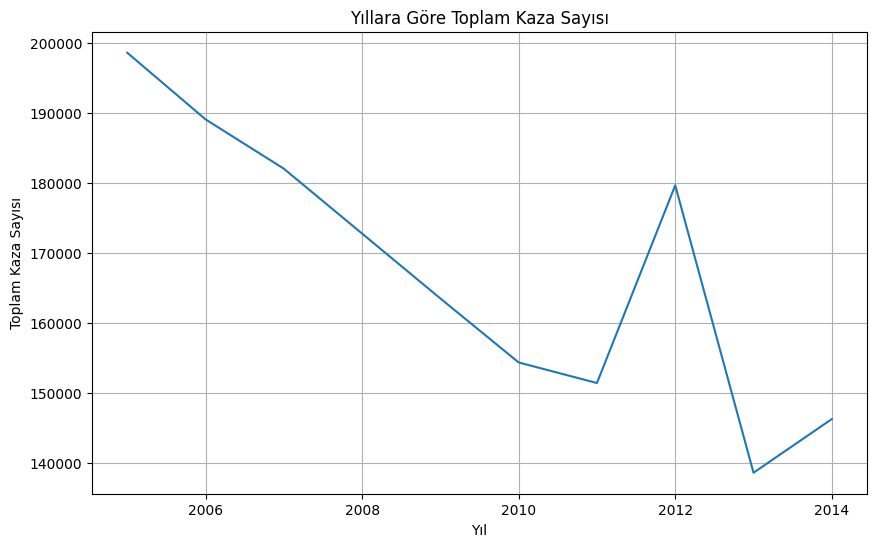

In [24]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Total_Accidents', data=df_merged_yearly)
plt.title('Yıllara Göre Toplam Kaza Sayısı')
plt.xlabel('Yıl')
plt.ylabel('Toplam Kaza Sayısı')
plt.grid(True)
plt.show()

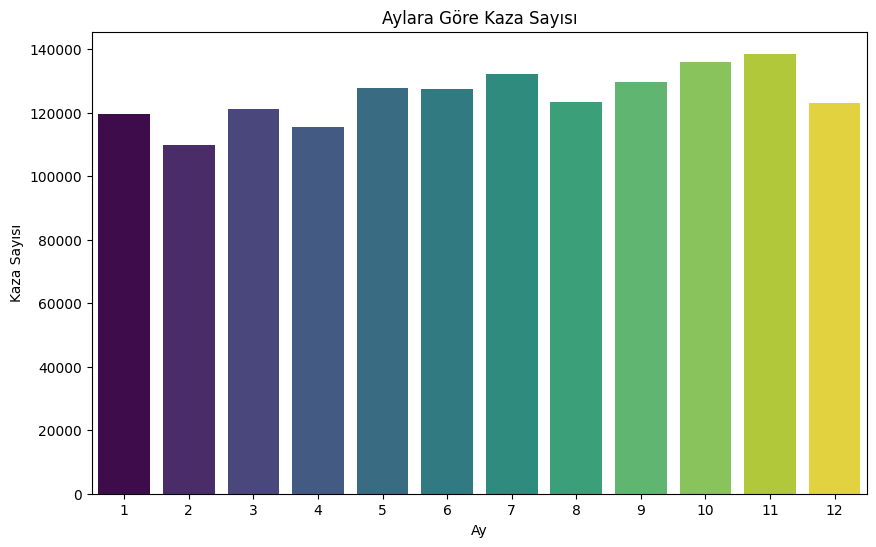

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=df_accidents, palette='viridis', hue='Month', legend=False)
plt.title('Aylara Göre Kaza Sayısı')
plt.xlabel('Ay')
plt.ylabel('Kaza Sayısı')
plt.show()

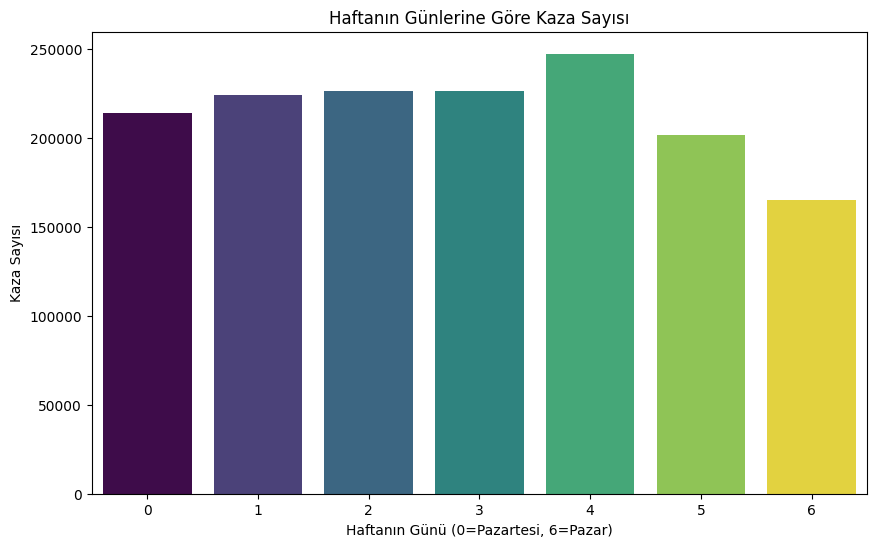

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='DayOfWeek', data=df_accidents, palette='viridis', hue='DayOfWeek', legend=False)
plt.title('Haftanın Günlerine Göre Kaza Sayısı')
plt.xlabel('Haftanın Günü (0=Pazartesi, 6=Pazar)')
plt.ylabel('Kaza Sayısı')
plt.show()

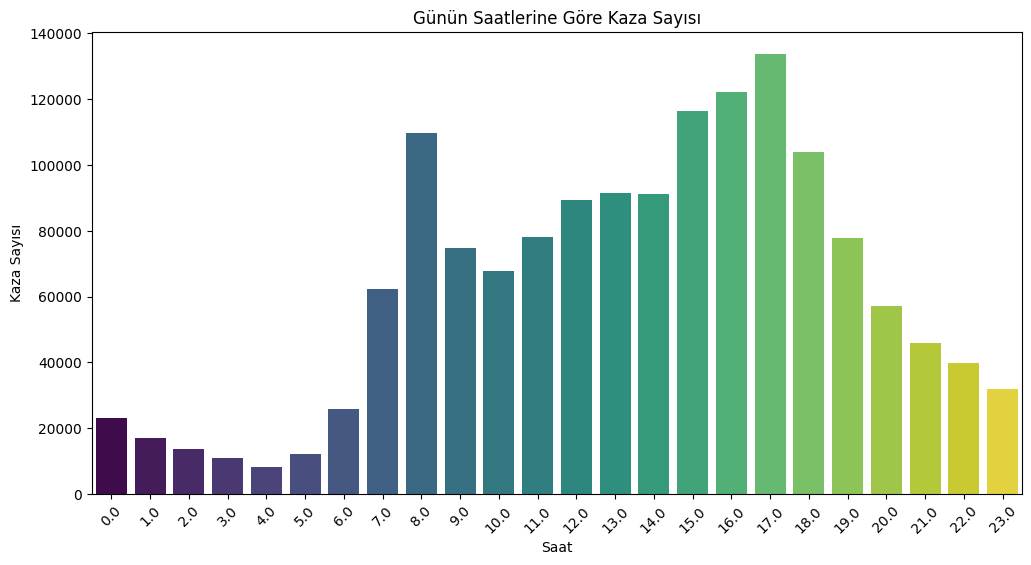

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', data=df_accidents, palette='viridis', hue='Hour', legend=False)
plt.title('Günün Saatlerine Göre Kaza Sayısı')
plt.xlabel('Saat')
plt.ylabel('Kaza Sayısı')
plt.xticks(rotation=45)
plt.show()

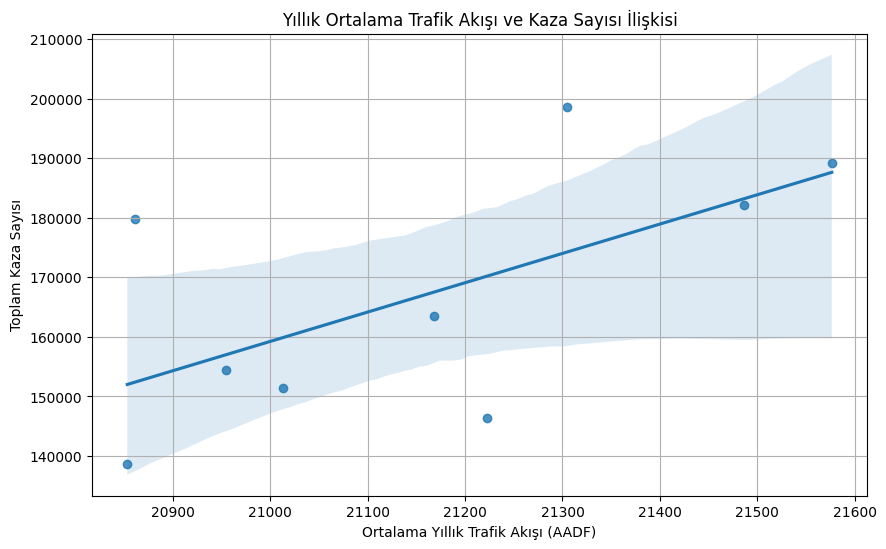

In [28]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Avg_Traffic_Flow', y='Total_Accidents', data=df_merged_yearly)
plt.title('Yıllık Ortalama Trafik Akışı ve Kaza Sayısı İlişkisi')
plt.xlabel('Ortalama Yıllık Trafik Akışı (AADF)')
plt.ylabel('Toplam Kaza Sayısı')
plt.grid(True)
plt.show()

In [29]:
# Görselleştirme aşamasında kullanacağımız subplotlar için sürekli yeni plot hesaplaması yapmak yerine bu işlemi hızlandırmak için 
# bu şekilde bir fonksiyon oluşturuyoruz 
def setup_subplots(plot_items_list):
    num_plots = len(plot_items_list)
    num_cols = 2
    num_rows = (num_plots + num_cols - 1) // num_cols

    figure, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols * 10, num_rows * 6))
    axes = axes.flatten()

    if num_plots < len(axes):
        for i in range(num_plots, len(axes)):
            figure.delaxes(axes[i])

    return figure, axes

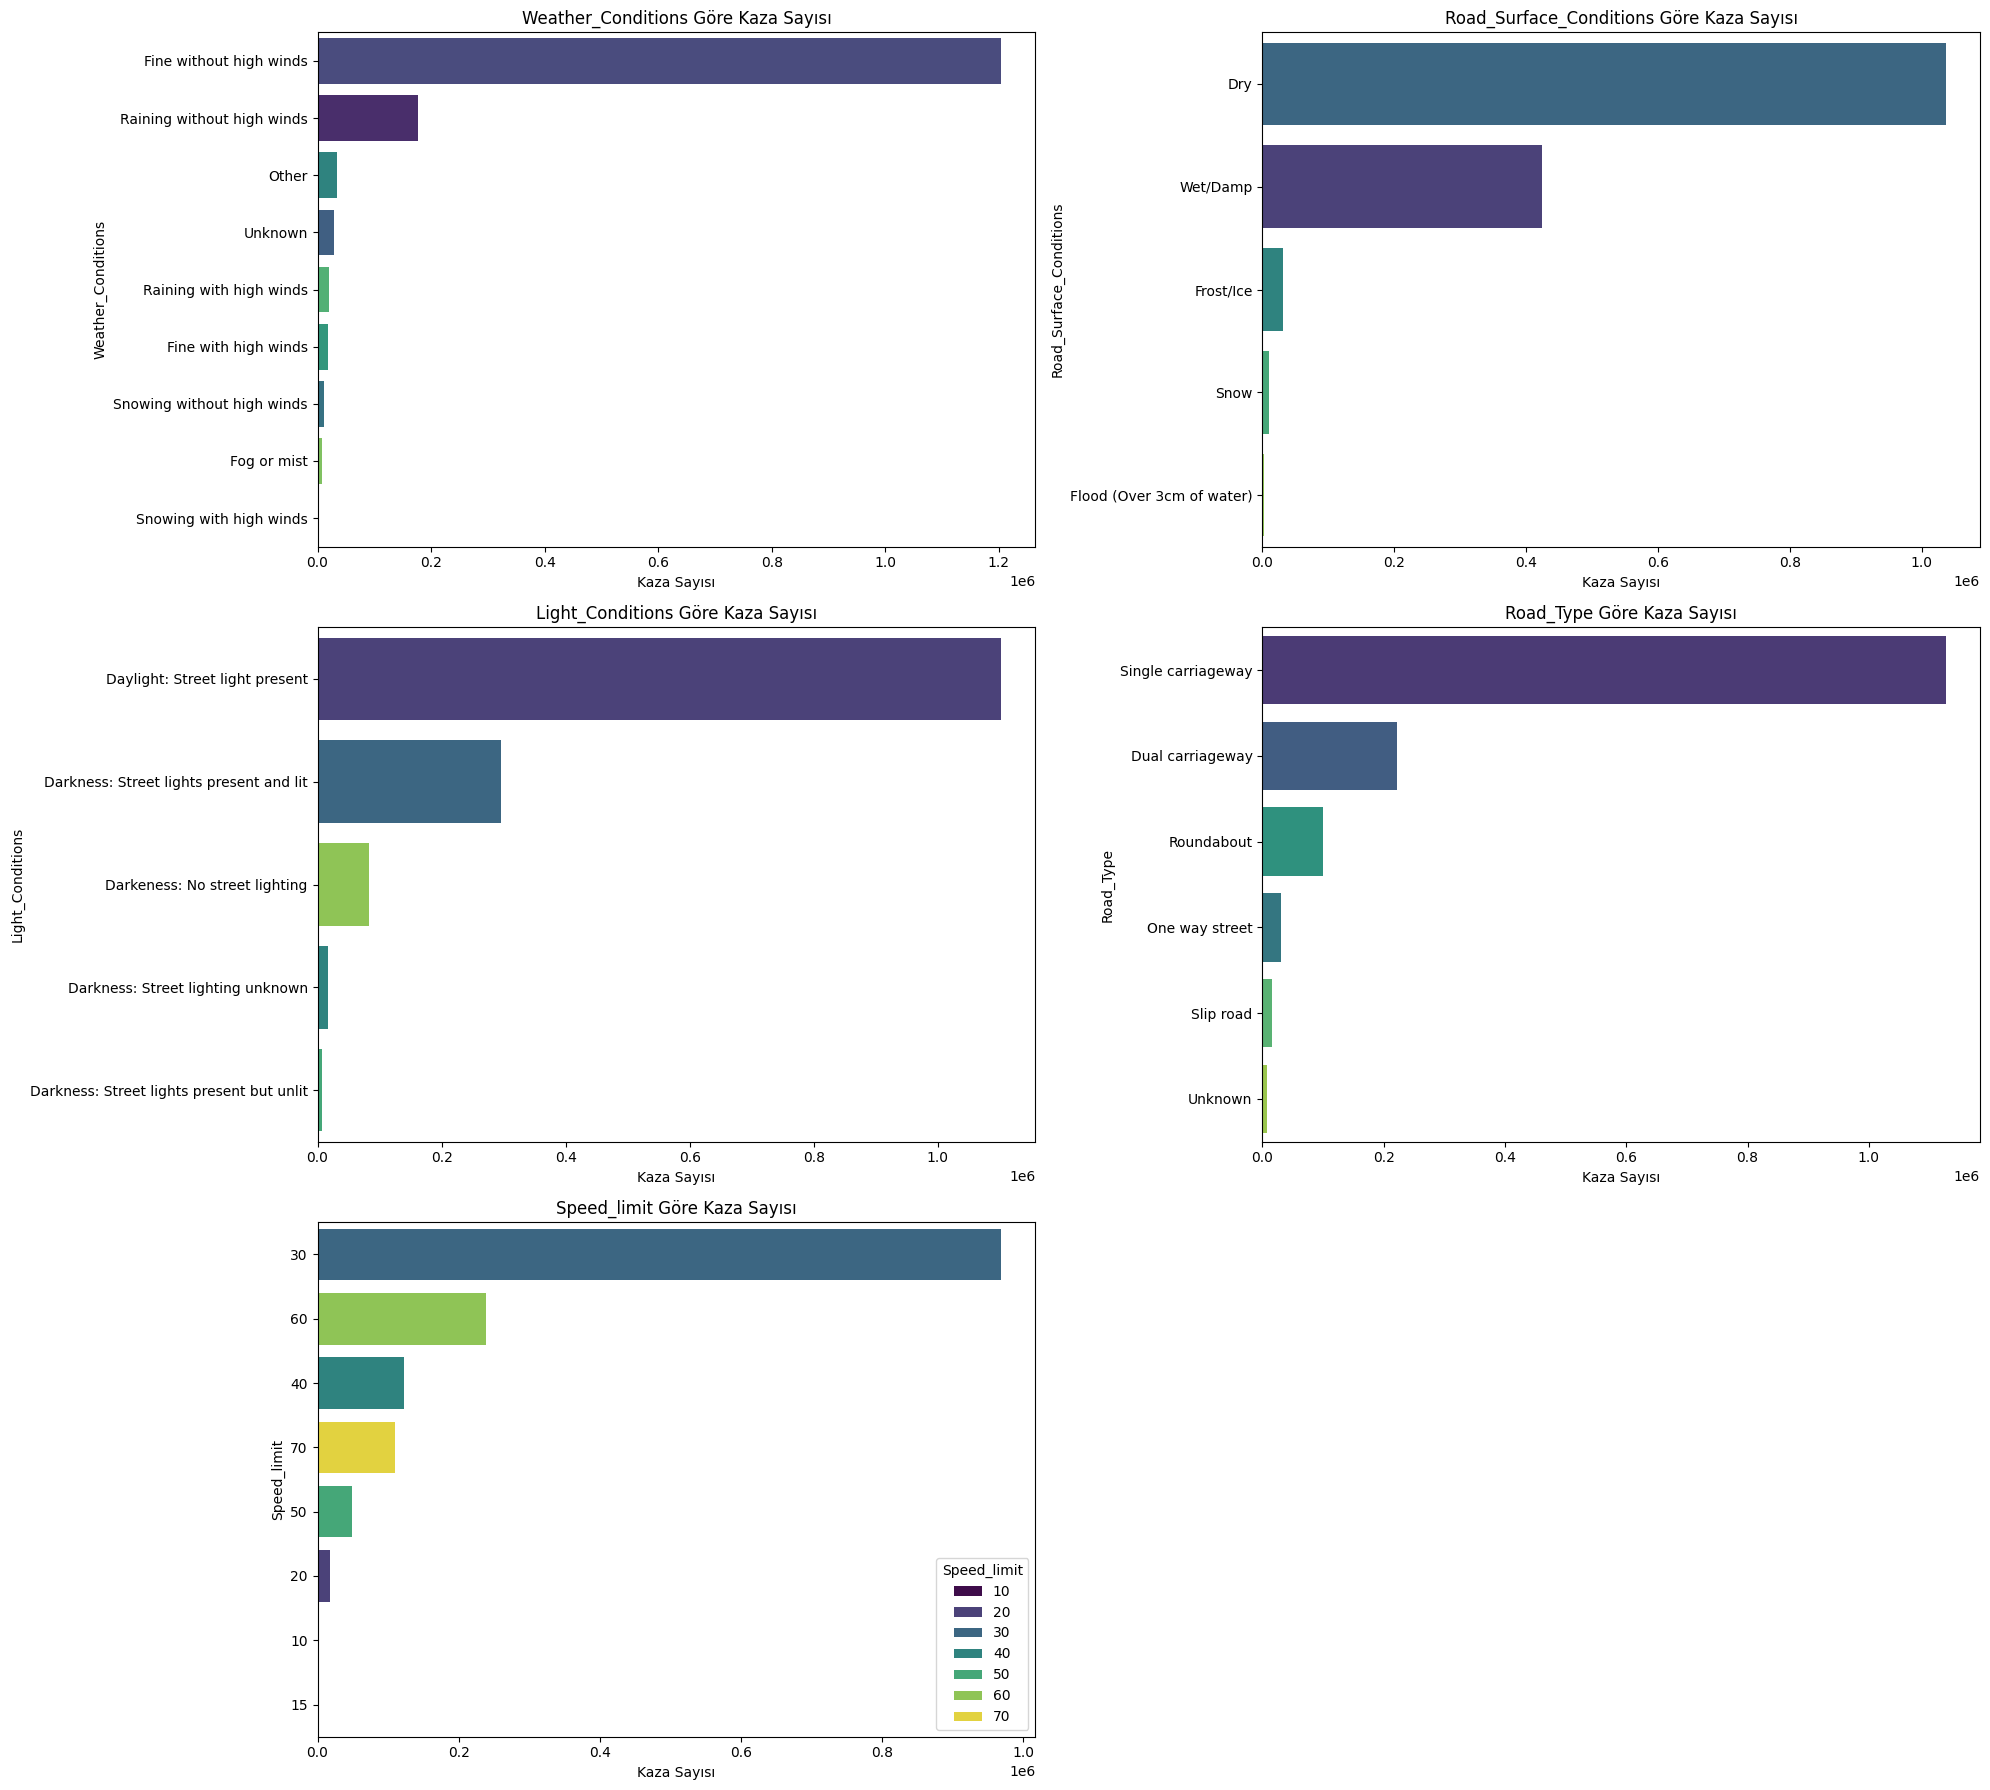

In [30]:
factors = ['Weather_Conditions', 'Road_Surface_Conditions', 'Light_Conditions', 'Road_Type', 'Speed_limit']

# Oluşturduğumuz kategorik değişkenleri subplots şeklinde sütun grafikleri görselleştiriyoruz
figure, axes = setup_subplots(factors)

for i,col in enumerate(factors):
    sns.countplot(y=col, data=df_accidents, ax=axes[i], hue=col, palette='viridis', order=df_accidents[col].value_counts().index)
    axes[i].set_title(f'{col} Göre Kaza Sayısı', fontsize=12)
    axes[i].set_ylabel(col, fontsize=10)
    axes[i].set_xlabel('Kaza Sayısı', fontsize=10)

plt.tight_layout()
plt.show()

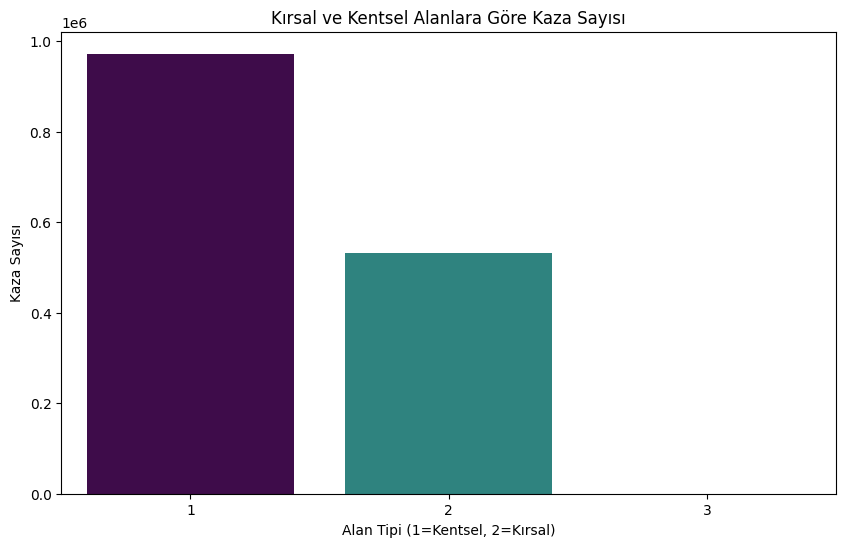

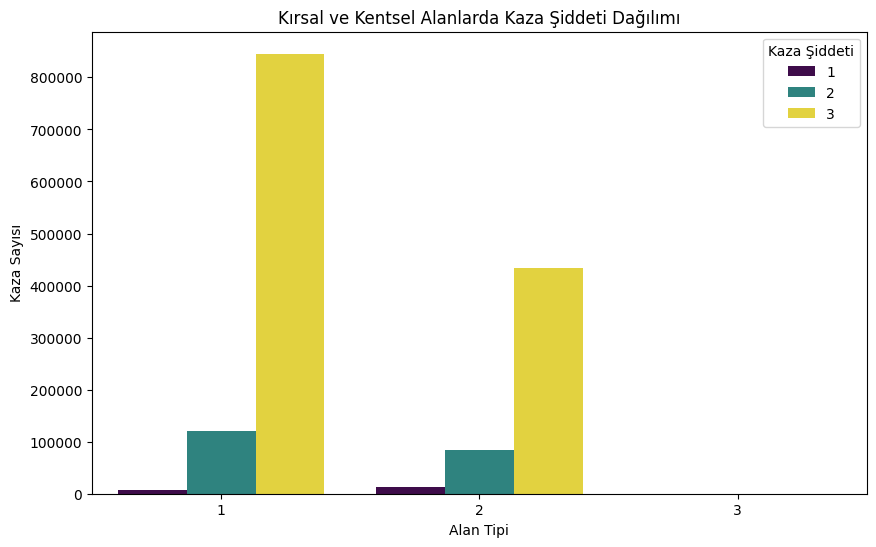

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Urban_or_Rural_Area', data=df_accidents, palette='viridis', hue='Urban_or_Rural_Area', legend=False)
plt.title('Kırsal ve Kentsel Alanlara Göre Kaza Sayısı')
plt.xlabel('Alan Tipi (1=Kentsel, 2=Kırsal)') # Veri setindeki karşılıkları kontrol et
plt.ylabel('Kaza Sayısı')
plt.show()

# Kaza şiddeti dağılımı
plt.figure(figsize=(10, 6))
sns.countplot(x='Urban_or_Rural_Area', hue='Accident_Severity', data=df_accidents, palette='viridis')
plt.title('Kırsal ve Kentsel Alanlarda Kaza Şiddeti Dağılımı')
plt.xlabel('Alan Tipi')
plt.ylabel('Kaza Sayısı')
plt.legend(title='Kaza Şiddeti')
plt.show()

## Modelleme (Zaman Serisi ve/veya Regresyon)

### Zaman Serisi Modeli (Kaza Oranları Tahmini):



In [32]:
# Aylık kaza sayısını hesapla
df_monthly_accidents = df_accidents.groupby(pd.PeriodIndex(df_accidents['Date'], freq="M"))['Accident_Index'].count().reset_index()
df_monthly_accidents['Date'] = df_monthly_accidents['Date'].dt.to_timestamp() # Tarihi datetime'a çevir
df_monthly_accidents.set_index('Date', inplace=True)
df_monthly_accidents.rename(columns={'Accident_Index': 'Total_Accidents'}, inplace=True)
df_monthly_accidents.head()

,Total_Accidents
Date,
2005-01-01,16275
2005-02-01,14520
2005-03-01,14973
2005-04-01,15660
2005-05-01,17026


21:37:38 - cmdstanpy - INFO - Chain [1] start processing
21:37:38 - cmdstanpy - INFO - Chain [1] done processing


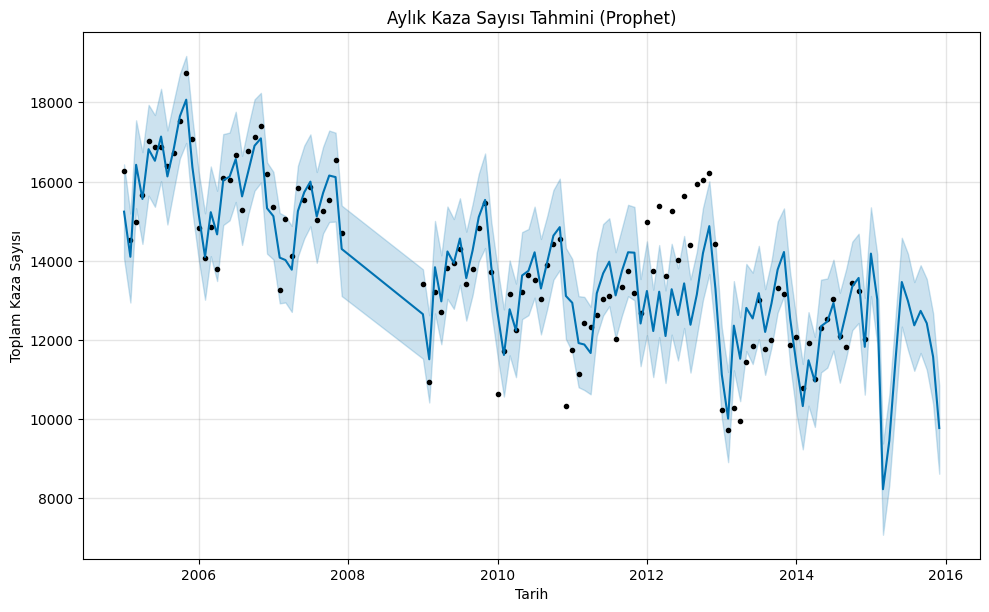

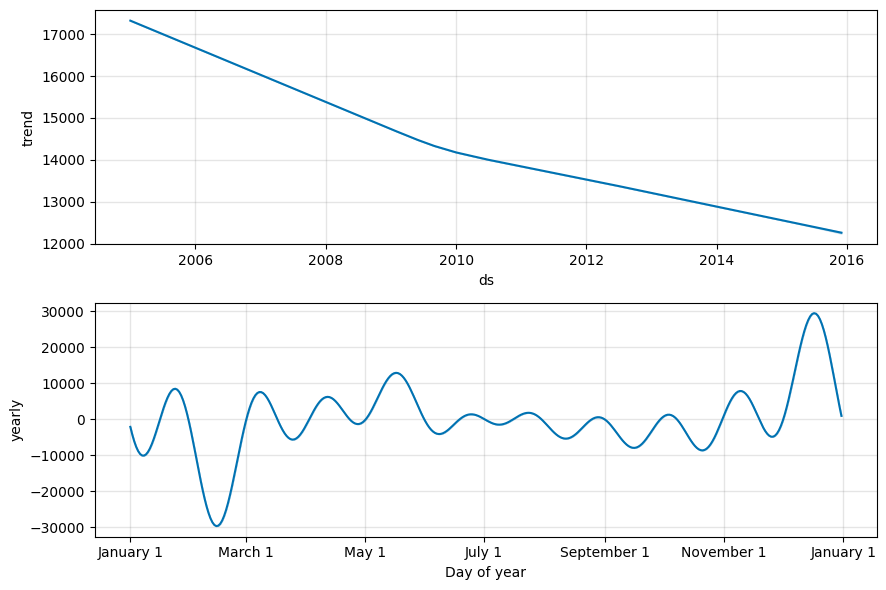

In [33]:
# Prophet için veri hazırlığı
df_prophet = df_monthly_accidents.reset_index()[['Date', 'Total_Accidents']]
df_prophet.columns = ['ds', 'y']

# Modeli oluştur ve eğit
model = Prophet()
model.fit(df_prophet)

# Gelecekteki tahminler için boş bir DataFrame oluştur
future = model.make_future_dataframe(periods=12, freq='ME') # Gelecek 12 ay için tahmin
forecast = model.predict(future)

# Tahminleri görselleştir
fig = model.plot(forecast)
plt.title('Aylık Kaza Sayısı Tahmini (Prophet)')
plt.xlabel('Tarih')
plt.ylabel('Toplam Kaza Sayısı')
plt.show()

# Trend ve mevsimsellik bileşenlerini görselleştir
fig2 = model.plot_components(forecast)
plt.show()

### Regresyon Modeli (Kaza Oranlarını Artıran Faktörler):

In [34]:
# Özellikler (X) ve Hedef (y)
features = ['Weather_Conditions', 'Road_Surface_Conditions', 'Light_Conditions',
            'Speed_limit', 'Urban_or_Rural_Area', 'DayOfWeek', 'Hour']
target = 'Accident_Severity'

# One-hot encoding
X = pd.get_dummies(df_accidents[features], columns=[col for col in features if df_accidents[col].dtype == 'object' or df_accidents[col].dtype == 'category'])
y = df_accidents[target]

# Eksik değerleri temizliyoruz (get_dummies sonrası NaN oluşmuş olabilir)
X.dropna(inplace=True)
y = y[X.index] # X ile y'yi senkronize ediyoruz

# Eğitim ve Test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # Stratify sınıf dengesi için önemli

# Modeli eğitiyoruz (Random Forest)
model_rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1) 
model_rf.fit(X_train, y_train)

# Tahmin yapıyoruz
y_pred = model_rf.predict(X_test)

# Özellik önemini inceliyoruz
feature_importances = pd.Series(model_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nÖzellik Önem Dereceleri:\n", feature_importances.head(10))


Özellik Önem Dereceleri:
 Hour                                                        0.421502
DayOfWeek                                                   0.219307
Speed_limit                                                 0.164934
Urban_or_Rural_Area                                         0.048943
Light_Conditions_Darkeness: No street lighting              0.017666
Light_Conditions_Daylight: Street light present             0.016507
Weather_Conditions_Fine without high winds                  0.012711
Light_Conditions_Darkness: Street lights present and lit    0.011453
Road_Surface_Conditions_Dry                                 0.011340
Road_Surface_Conditions_Wet/Damp                            0.009924
dtype: float64


In [35]:
# Model performansını değerlendiriyoruz
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.04      0.00      0.00      5832
           2       0.19      0.01      0.01     61340
           3       0.85      1.00      0.92    384008

    accuracy                           0.85    451180
   macro avg       0.36      0.33      0.31    451180
weighted avg       0.75      0.85      0.78    451180

[[     7     67   5758]
 [    26    337  60977]
 [   126   1397 382485]]



--- Model 1: Random Forest (Sınıf Ağırlıklı) ---

Sınıf Ağırlıklı Random Forest Sınıflandırma Raporu:
              precision    recall  f1-score   support

           1       0.03      0.44      0.05      5832
           2       0.15      0.21      0.18     61340
           3       0.88      0.63      0.73    384008

    accuracy                           0.57    451180
   macro avg       0.35      0.42      0.32    451180
weighted avg       0.77      0.57      0.65    451180



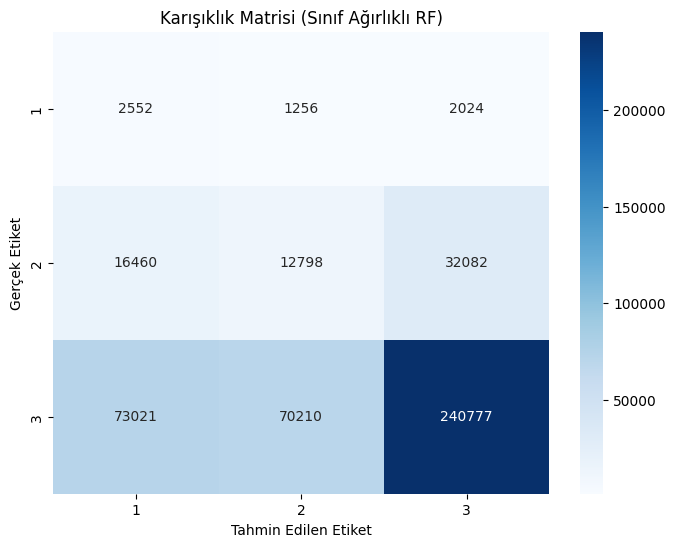


Özellik Önem Dereceleri (Sınıf Ağırlıklı RF):
Hour                                                        0.367096
Speed_limit                                                 0.205268
DayOfWeek                                                   0.190418
Urban_or_Rural_Area                                         0.087638
Light_Conditions_Darkeness: No street lighting              0.029892
Light_Conditions_Daylight: Street light present             0.021768
Light_Conditions_Darkness: Street lights present and lit    0.012795
Weather_Conditions_Fine without high winds                  0.010433
Road_Surface_Conditions_Wet/Damp                            0.009344
Road_Surface_Conditions_Dry                                 0.008721
dtype: float64


In [36]:
print("\n--- Model 1: Random Forest (Sınıf Ağırlıklı) ---")

# Sınıf ağırlıklarını otomatik olarak hesapla
# 'balanced' parametresi, örnek sayısına göre ters orantılı ağırlıklar atar.
rf_classifier_weighted = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)
# n_jobs=-1, tüm çekirdekleri kullanarak eğitimi hızlandırır.

rf_classifier_weighted.fit(X_train, y_train)

# Tahminleri al
y_pred_weighted = rf_classifier_weighted.predict(X_test)

# Performans raporunu yazdır
print("\nSınıf Ağırlıklı Random Forest Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_weighted))

# Karışıklık Matrisini Görselleştir
cm_weighted = confusion_matrix(y_test, y_pred_weighted)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_weighted, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_classifier_weighted.classes_,
            yticklabels=rf_classifier_weighted.classes_)
plt.title('Karışıklık Matrisi (Sınıf Ağırlıklı RF)')
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.show()

# Özellik Önem Derecelerini Çek ve Yazdır (Bu da değişebilir)
feature_importances_weighted = pd.Series(rf_classifier_weighted.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("\nÖzellik Önem Dereceleri (Sınıf Ağırlıklı RF):")
print(feature_importances_weighted.head(10))


--- Model 2: Random Forest (SMOTE ile Aşırı Örneklenmiş Veri) ---
SMOTE sonrası X_train_res boyutu: (2688048, 23)
SMOTE sonrası Y_train_res sınıf dağılımı:
Accident_Severity
2    0.333333
3    0.333333
1    0.333333
Name: proportion, dtype: float64

SMOTE'lu Random Forest Sınıflandırma Raporu:
              precision    recall  f1-score   support

           1       0.03      0.40      0.05      5832
           2       0.15      0.22      0.18     61340
           3       0.87      0.63      0.73    384008

    accuracy                           0.57    451180
   macro avg       0.35      0.42      0.32    451180
weighted avg       0.76      0.57      0.65    451180



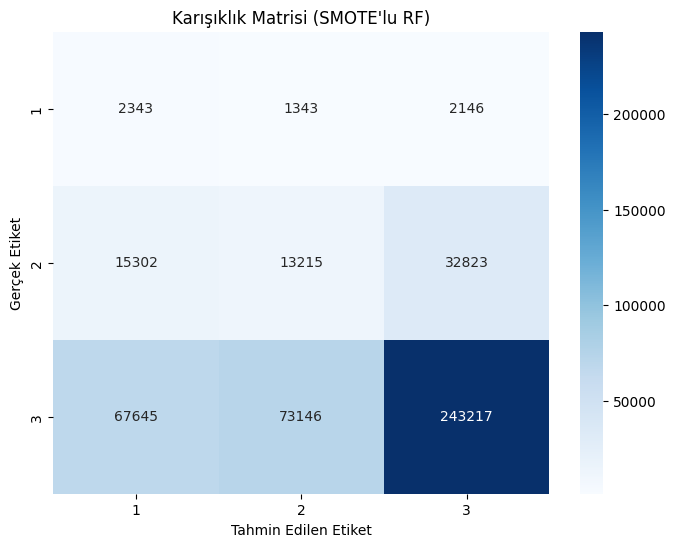


Özellik Önem Dereceleri (SMOTE'lu RF):
Hour                                                        0.406030
Speed_limit                                                 0.166869
DayOfWeek                                                   0.106881
Urban_or_Rural_Area                                         0.057024
Light_Conditions_Darkeness: No street lighting              0.042233
Weather_Conditions_Fine without high winds                  0.030767
Light_Conditions_Darkness: Street lights present and lit    0.024146
Light_Conditions_Daylight: Street light present             0.021770
Road_Surface_Conditions_Wet/Damp                            0.018303
Weather_Conditions_Raining without high winds               0.018044
dtype: float64


In [37]:
print("\n--- Model 2: Random Forest (SMOTE ile Aşırı Örneklenmiş Veri) ---")

# SMOTE uygulayın
# random_state sabitlemek sonuçların tekrarlanabilir olmasını sağlar
smote = SMOTE(random_state=42, k_neighbors=5) # k_neighbors komşu sayısı (varsayılan 5)

# Eğitim verisi üzerinde SMOTE uygula
# Sadece eğitim setini aşırı örnekliyoruz, test setini olduğu gibi bırakıyoruz.
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print(f"SMOTE sonrası X_train_res boyutu: {X_train_res.shape}")
print(f"SMOTE sonrası Y_train_res sınıf dağılımı:\n{y_train_res.value_counts(normalize=True)}")

# Aşırı örneklenmiş veri ile Random Forest'ı eğit
rf_classifier_smote = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_classifier_smote.fit(X_train_res, y_train_res)

# Tahminleri al
y_pred_smote = rf_classifier_smote.predict(X_test)

# Performans raporunu yazdır
print("\nSMOTE'lu Random Forest Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_smote))

# Karışıklık Matrisini Görselleştir
cm_smote = confusion_matrix(y_test, y_pred_smote)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_classifier_smote.classes_,
            yticklabels=rf_classifier_smote.classes_)
plt.title('Karışıklık Matrisi (SMOTE\'lu RF)')
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.show()

# Özellik Önem Derecelerini Çek ve Yazdır
feature_importances_smote = pd.Series(rf_classifier_smote.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("\nÖzellik Önem Dereceleri (SMOTE'lu RF):")
print(feature_importances_smote.head(10))